In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
#from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = boston.target

In [9]:
#SPlitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [10]:
# Standardising Dataset
from sklearn.preprocessing import StandardScaler
std =  StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)
#print(X_train)

In [11]:
train_data = pd.DataFrame(X_train)
train_data['price'] = Y_train
print(train_data.head(5))

          0         1         2         3         4         5         6  \
0  0.911839 -0.502419  1.072305 -0.256978  1.633548  0.486034  0.962774   
1 -0.411727 -0.502419 -1.129795 -0.256978 -0.552451  1.028078  0.668619   
2  0.124583 -0.502419  1.072305 -0.256978  1.441946 -3.913414  0.725324   
3 -0.406208  0.839388 -0.901940 -0.256978 -1.083710  0.097426 -0.515087   
4  0.021742 -0.502419  1.072305 -0.256978  1.398401  0.123238  0.743044   

          7         8         9        10        11        12  price  
0 -0.823477  1.655334  1.552100  0.808078 -2.842959  1.523203   13.4  
1 -0.183274 -0.871371 -0.802704 -0.304174  0.427436 -0.995240   23.6  
2 -1.075955  1.655334  1.552100  0.808078 -0.053353 -0.765646   27.5  
3  1.600509 -0.411970 -0.624310 -0.860301  0.152292 -0.184576   22.2  
4 -0.605107  1.655334  1.552100  0.808078  0.365116  0.301538   17.7  


In [12]:
import numpy as np
X_test = np.array(X_test)
Y_test = np.array(Y_test)

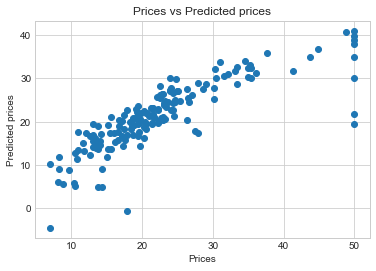

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sns.set_style('whitegrid')
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [14]:
#computing mse of predicted value with actual value
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error = ",mse)

Mean Squared Error =  30.401375263028108


In [15]:
#computing weight vector
sklearn_weight = sgd.coef_
print(sklearn_weight)

[-0.80540265  0.55123025 -0.3609666   0.27295331 -0.42272526  3.12882968
 -0.41042979 -1.86815413  0.58446863 -0.58028065 -1.78728374  0.87637514
 -3.09530389]


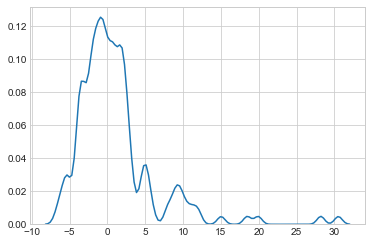

In [16]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


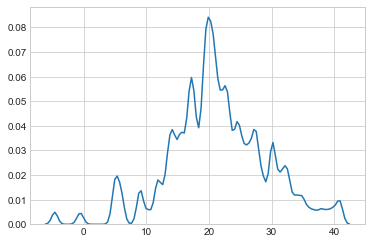

In [17]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [18]:
# Custom implementation of SGD 
#initialising weight= w, intercept= b, learning rate= r, batch size= k and no. of iterations

w_new = np.zeros(shape=(1,train_data.shape[1]-1))
b_new = 0
n_iter = 1000
r = 0.01
k = 20
while n_iter>=0:
    w = np.zeros(shape=(train_data.shape[1]-1))
    b = 0
    w_old = w_new
    b_old = b_new
    temp=train_data.sample(k)
    x= np.array(temp.drop('price', axis= 1))
    y= np.array(temp['price'])
   
    for i in range(k):
        w += (-2)*x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))
        b += (-2)*(y[i]-(np.dot(w_old,x[i])+b_old))
      
    w_new = (w_old -(r*w)/k)
    b_new = (b_old -(r*b)/k)
    n_iter -= 1
    
print("weights= ",w_new)
print("intercepts= ",b_new)

weights=  [[-1.29023745  0.77532249 -0.41861185  0.20488287 -1.46158278  2.73105294
  -0.24289078 -2.88145121  2.26667305 -1.32014564 -2.12368961  1.04496523
  -3.44570697]]
intercepts=  [22.58456332]


In [19]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names=['Calculated_Weight','Sklearn_SGD_Weight']
for i in range(13):
    x.add_row([w_new[0][i],sklearn_weight[i]])
print(x)

+----------------------+----------------------+
|  Calculated_Weight   |  Sklearn_SGD_Weight  |
+----------------------+----------------------+
|  -1.290237452473335  | -0.8054026495208767  |
|  0.7753224921104531  |  0.5512302485101066  |
| -0.41861184905397897 | -0.3609666039531254  |
| 0.20488287086390652  | 0.27295330658588585  |
| -1.4615827819061666  | -0.4227252624003467  |
|  2.7310529372147374  |  3.128829675736134   |
| -0.24289078307210887 | -0.41042979067433283 |
|  -2.88145121038213   | -1.8681541283633187  |
|  2.266673053248023   |  0.5844686250910114  |
| -1.3201456407596128  |  -0.580280650819712  |
|  -2.123689610374638  | -1.7872837408159958  |
|  1.0449652345634717  |  0.8763751403496751  |
|  -3.445706967276996  |  -3.095303887379492  |
+----------------------+----------------------+


In [20]:
#Computing predicted prices from customised weight vectors and intercept
y_pred_cal = []
for i in range (len(X_test)):
    y= np.dot(w_new, X_test[i])+b_new
    y_pred_cal.append(np.asscalar(y))
#print(y_pred_cal)

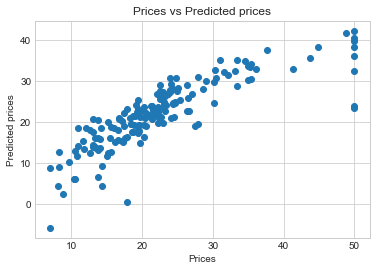

In [21]:
#Scatter plot between customised predicted price and actual price
#Y_pred = sgd.predict(X_test)
sns.set_style('whitegrid')
plt.scatter(Y_test, y_pred_cal)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [23]:
# MSE from calculated predicted prices
from sklearn.metrics import mean_squared_error
mse_cal = mean_squared_error(Y_test, y_pred_cal)
print("Mean Squared Error = ",mse_cal)

Mean Squared Error =  28.16388359399173


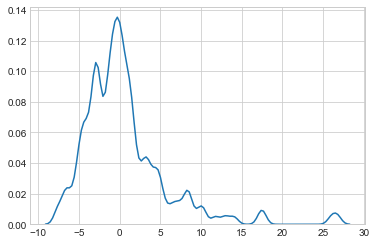

In [24]:
cal_delta_y = Y_test - y_pred_cal;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(cal_delta_y), bw=0.5)
plt.show()


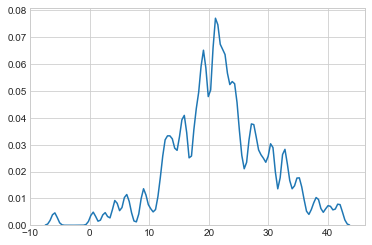

In [25]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred_cal), bw=0.5)
plt.show()

In [26]:
print("Sklearn SGD Mean Squared Error = ",mse)
print("Custom implementation of SGD Mean Squared Error = ",mse_cal)

Sklearn SGD Mean Squared Error =  30.401375263028108
Custom implementation of SGD Mean Squared Error =  28.16388359399173
